# Project Title:
Predictive Model for Cloud Instances Selection using Naive Bayes Classifier (Scikit ML Library)

## 1. Library

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

# 2. Train Dataset

In [190]:
# dataset 
df_train = pd.read_csv("dataset_compute.csv")
df_train

,Rating,Cost(per hour USD),Cloud Instances
0,4.000000,0.0928,t2.large
1,2.000000,0.0832,B2ms
2,3.666667,0.0950,N1s2
3,3.333333,0.0150,Lin.G
4,2.666667,0.1000,c4.large
5,1.000000,0.0850,F2s
6,2.666667,0.0709,N1cc
7,3.000000,0.0450,Lin.C
8,4.000000,0.1330,r4.large
9,4.000000,0.1260,E2s


Dataset has three columns: rating, cost and cloud instance name. RFC has classiffed the cloud instances using rating. The A2CLOUD rating is obtained from RFC output and cost data has been collected from cloud providers website.

# 3. Data Preprocessing 

In [191]:
le = preprocessing.LabelEncoder()
df_train['instance']=le.fit_transform(df_train['Cloud Instances'])
df_train

,Rating,Cost(per hour USD),Cloud Instances,instance
0,4.000000,0.0928,t2.large,13
1,2.000000,0.0832,B2ms,0
2,3.666667,0.0950,N1s2,8
3,3.333333,0.0150,Lin.G,4
4,2.666667,0.1000,c4.large,9
5,1.000000,0.0850,F2s,2
6,2.666667,0.0709,N1cc,7
7,3.000000,0.0450,Lin.C,3
8,4.000000,0.1330,r4.large,12
9,4.000000,0.1260,E2s,1


Label Encoder converts categorical text data into model-understandable numerical data. We have been used Scikit-Learn Label Encoder class. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

# 4. Exploratory Data Analysis

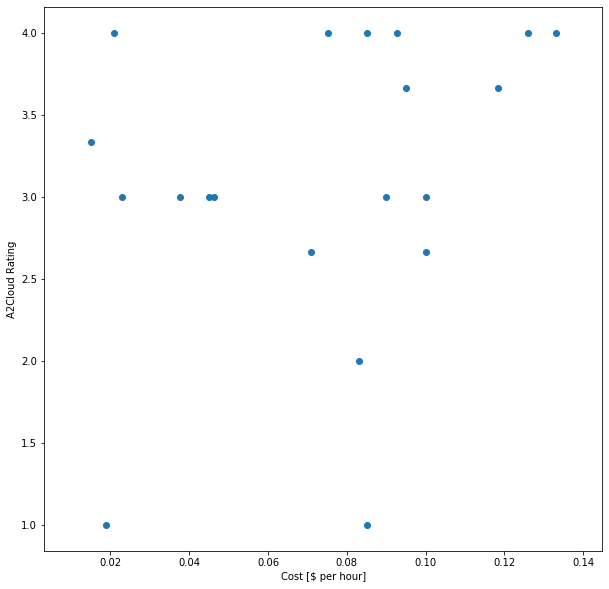

In [192]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df_train.iloc[:,1:2],df_train.iloc[:,0:1],  marker='o')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')
plt.show()

# 5. K-Means Clustering 

In [193]:
#df_kmeans=df
X=df_train.iloc[:,0:2]
#y_actual=[0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2]# 0: excellent, 1: bad, 2: avg cluster 

#y_actual=[0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]# 0: excellent, 1: avg, 2: bad cluster  

model = KMeans(n_clusters = 3)

kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels



array([2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2],
      dtype=int32)

In [194]:
df_train

,Rating,Cost(per hour USD),Cloud Instances,instance
0,4.000000,0.0928,t2.large,13
1,2.000000,0.0832,B2ms,0
2,3.666667,0.0950,N1s2,8
3,3.333333,0.0150,Lin.G,4
4,2.666667,0.1000,c4.large,9
5,1.000000,0.0850,F2s,2
6,2.666667,0.0709,N1cc,7
7,3.000000,0.0450,Lin.C,3
8,4.000000,0.1330,r4.large,12
9,4.000000,0.1260,E2s,1


Labels are going to change each run among clusters. For example, a cluster may be expressed as 0 but future run its gonna expressed as 1. However, overall label tags will be reamined same. 
To avoid labeling confusion, I will assaign fixed label using the very first run of Kmeans. Number of cluster and labels are associated with instance will be same.   

In [195]:
# K MEANS output
static_label=pd.DataFrame([0, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0]) # # 0: excellent, 1: avg, 2: bad cluster

#by observation 
#static_label=pd.DataFrame([0,2,0,1,1,2,1,1,0,0,0,1,0,1,1,1,0,1,2,0]) # # 0: excellent, 1: avg, 2: bad cluster

df_train['cluster']=static_label

Text(0, 0.5, 'A2Cloud Rating')

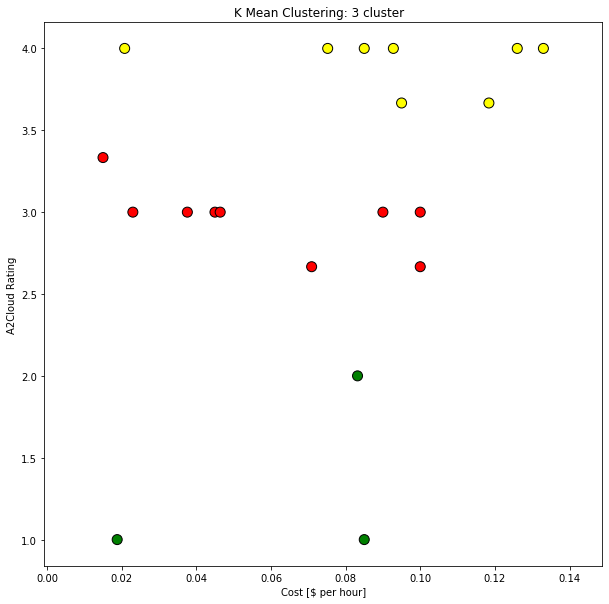

In [196]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow'])
plt.scatter(df_train.iloc[:,1:2], df_train.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 3 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')

# 6. Gaussian NB Classifier Train

In [197]:
xtrain=df_train[['Rating','Cost(per hour USD)']]
ytrain=df_train['cluster'].values.tolist()

In [198]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)


GaussianNB(priors=None, var_smoothing=1e-09)

# 7. Gaussian NB Classifier Test

In [199]:
# dataset 
df_test = pd.read_csv("dataset_compute_LULESH_runtime.csv")
df_test

,Rating,Cost(per hour USD),Cloud Instances
0,2.666667,0.0928,t2.large
1,1.666667,0.0832,B2ms
2,3.000000,0.0950,N1s2
3,2.000000,0.0150,Lin.G
4,3.000000,0.1000,c4.large
5,2.666667,0.0850,F2s
6,3.333333,0.0709,N1cc
7,2.000000,0.0450,Lin.C
8,3.000000,0.1330,r4.large
9,3.000000,0.1260,E2s


In [200]:
#df_kmeans=df
X=df_test.iloc[:,0:2]

model_test = KMeans(n_clusters = 3)

kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1],
      dtype=int32)

Text(0, 0.5, 'A2Cloud Rating')

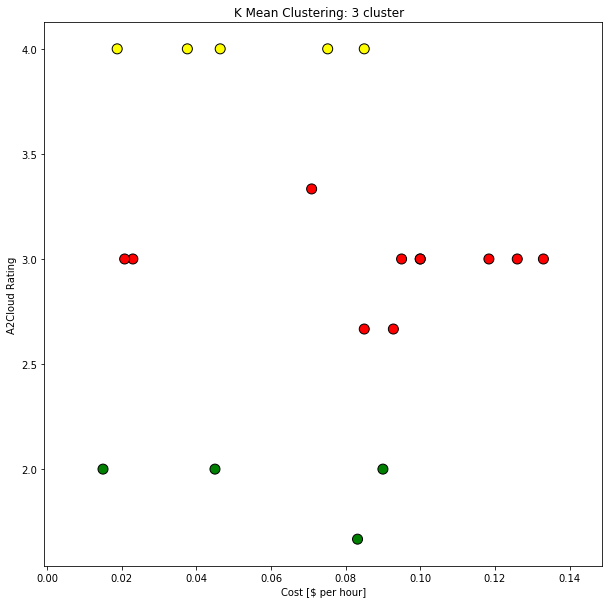

In [201]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow'])
plt.scatter(df_test.iloc[:,1:2], df_test.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 3 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')

In [202]:
y_actual=[1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1] # LULESH Runtime rating 

# OBSERVATION
#y_actual=[0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2] # LULESH Runtime rating 

xtest=df_test[['Rating','Cost(per hour USD)']]

In [203]:
# Prediction
y_pred = classifier.predict(xtest)
y_pred


array([1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1])

# NB Classifier Evaluation Metrics

### 7.1 Confusion Matrix

In [204]:
print(confusion_matrix(y_pred, y_actual))


[[ 5  0  0]
 [ 0 11  0]
 [ 0  0  4]]


### 7.2 Model Accuracy 

In [205]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 100.0 %


### 7.3 Model Precision, Recall and F1-score


In [206]:
print(classification_report(y_pred,y_actual))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### 7.4 Model Mean Absolute Error 


In [207]:
mean_absolute_error(y_pred,y_actual)

0.0

# Confusion Matrix Plot

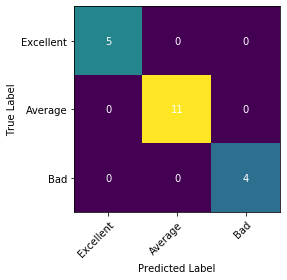

In [208]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

a_label = ["Excellent", "Average", "Bad"]
p_label = ["Excellent", "Average", "Bad"]

#harvest = np.array([[4,0,0],[0,0,0], [0,7,1]])
cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [209]:
y_pred

array([1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1])